# Machine Learning and Data Visualization with Python

In [8]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [9]:
# Load the dataset

df = pd.read_csv('longley.csv', index_col=0)

In [10]:
# Display correlation coefficient between 'Employed' and 'GNP'

print("Correlation coefficient between 'Employed' and 'GNP':", 
      np.corrcoef(df.Employed, df.GNP)[0, 1])

# This gives us a very high correlation of .98. That is positive and large, which means as one goes up,
# the other does too. This is a very strong relationship.

Correlation coefficient between 'Employed' and 'GNP': 0.9835516111796693


In [12]:
# Prepare the data for regression analysis

X = df.Employed  # Independent variable
y = df.GNP  # Dependent variable
X = sm.add_constant(X)  # Adds the constant term to the predictor 

# What is the meaning of the last line? Recall the line equation is "y = c + mX". Here, X represents the
# right side of this equation, so we need to add that c (constant) to it.

In [13]:
# Fit the linear regression model

model = sm.OLS(y, X).fit()

# Here, "model" is the model built using linear regression with the OLS fitting approach.

In [14]:
# Print the summary of the linear regression model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GNP   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           8.36e-12
Time:                        16:14:56   Log-Likelihood:                -68.391
No. Observations:                  16   AIC:                             140.8
Df Residuals:                      14   BIC:                             142.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1430.4823     89.361    -16.008      0.0

/home/lauren/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# From the results, the values of coefficients can be found, one for const (constant) and the other for GNP
# Thus, our regression equation is:
#
#   GNP = const + coeff * Employed
#
# using the actual values from the results of our regression analysis:
#
#   GNP = -1430.4823 + 27.8363 * Employed
#

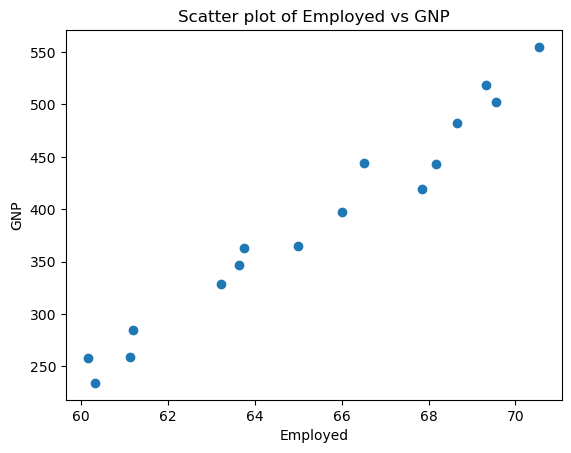

In [7]:
# Scatter plot of raw data

plt.scatter(df['Employed'], df['GNP'])
plt.xlabel('Employed')
plt.ylabel('GNP')
plt.title('Scatter plot of Employed vs GNP')
plt.show()

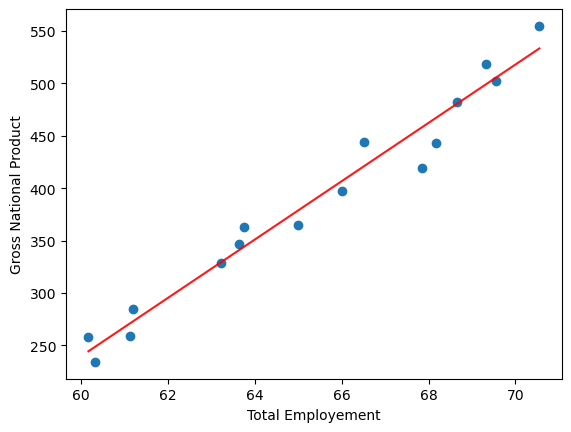

In [17]:
# Scatter plot of predicted values with linear regression line

# Pick 100 points equally spaced from the min to the max

X_prime = np.linspace(X.Employed.min(), X.Employed.max(), 100)
X_prime = sm.add_constant(X_prime) # Add a constant

# # Now calculate predicted values

y_hat = model.predict(X_prime)

plt.scatter(X.Employed, y) # Plot the raw data
plt.xlabel("Total Employement")
plt.ylabel("Gross National Product")
plt.plot(X_prime[:, 1], y_hat, "red", alpha = 0.9) # Add the regression line in red

# If the above code works funky try the below code:

# plt.figure(1)
# plt.subplot(211)
# plt.scatter(df.Employed, df.GNP)
# plt.subplot(212)
# plt.scatter(X.Employed, y) # Plot the raw data
# plt.xlabel("Total Employement")
# plt.ylabel("Gross National Product")
# plt.plot(X_prime[:, 1], y_hat, "red", alpha = 0.9) # Add the regression line in red

In [ ]:
In basic statistics, we learn about hte notion of variance. Variance tells us how much our data
is spread out. For example, if I tell you that the average score in an exam in my class is 80, you do 
not know if every student in my class got 80 or if the scores ranged from 60 to 100. Even if I were
to tell you that it was the latter, you still do not konw how many were close to 60 and how many
were close to 100. Variance allows us to 